<a href="https://colab.research.google.com/github/kclassie/ML_sundries/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D1%82%D1%80%D0%B8_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D0%B0_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №3

Запускайте этот ноутбук в google colab! Файлы с разрешением .ipynb можно открывать на гугл диске с помощью Google Colaboratory. Не забудьте подключить GPU! Видео, где рассказано о основе работы с Google Colab: [YouTube](https://www.youtube.com/watch?v=HWN_DVRB1G4&feature=youtu.be) (есть возможность включить английские субтитры).

Run this note using google colab! You can open .ipynb files on google drive using Google Colaboratory. Don't forget to turn GPU on. There's a video tutorial for Google Colab: [YouTube](https://www.youtube.com/watch?v=HWN_DVRB1G4&feature=youtu.be) (уnglish subtitles are available)

### Задча №1

Сравним качество распознавания изображений, время обучения, время работы и количество параметров у нескольких нейронных сетей.
Прежде всего обучим сверточную нейросеть, которую мы построили на семинаре. В качестве данных будем использовать известный набор [CIFAR10](http://www.cs.toronto.edu/~kriz/cifar.html), в котором 60000 изображений 10 классов размера 32x32 (по 6 тысяч изображений на каждый класс) - 10000 в тестовом наборе и 50000 в тренировочном.

Compare image recognition quality, learning time, runtime and number of parameters for several neural networks. First of all train convolutional neural network we built in class. Use [CIFAR10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset, which contains 60000 images of 10 classes, size 32x32. 10000images for test and 50000 for train.

**Load the data:**

In [ ]:
%tensorflow_version 1.x magic
import numpy as np
from PIL import Image
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras.utils import to_categorical
from  keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Conv2D, BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline 

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x magic`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
nb_classes = 5
img_rows, img_cols = 100, 100
img_channels = 3
classes = ['1', '2', '3', '4', '5']

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・
batch_size = 32
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
nb_epoch = 50 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
data = os.getcwd() + "/gdrive/images2/"
data.shape

In [ ]:
# Using load_data()
import os


(X_train, y_train), (X_test, y_test) = os.getcwd() + "/gdrive/images2/"

In [ ]:
num_train = X_train.shape[0]
num_test = X_test.shape[0]

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (50000, 32, 32, 3) (50000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


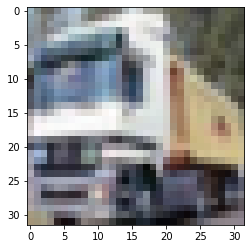

Class number: [9]
Object type: truck


In [ ]:
# Image example

n = 1
plt.imshow(X_train[n])
plt.show()
print("Class number:", y_train[n])
print("Object type:", classes[y_train[n][0]])

In [ ]:
# Нормируем входы, чтобы значения якости всех пикселей были в диапазоне 0-1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
# Переведем метки класса в формат onehotencoder

print(y_train[n])

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print(y_train[n])

[9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**Реализуйте и обучите такую же сверточную нейронную сеть, которая была нa семинаре (copy-paste), не забыв изменить параметры входного изображения:**

**Make and train a neural network exactly like we did in class (copy-paste). Don't forget to change parameters of input tensor**

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape = (32, 32, 3)))
classifier.add(BatchNormalization(axis = -1)) #Axis -1 is always the features axis
classifier.add(Activation('relu'))

classifier.add(Conv2D(32, (3,3)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))
classifier.add(BatchNormalization(axis = -1))

classifier.add(Conv2D(64, (3,3)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Activation('relu'))

classifier.add(Conv2D(64, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))

classifier.add(Flatten()) # Вытягиваем в вектор
classifier.add(BatchNormalization())

classifier.add(Dense(512))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(10))
classifier.add(Activation('softmax'))

In [ ]:
# Посмотрим на модель
# Have a look at our model (use .summary())

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)       

Скомпилируйте и обучите сеть с использованием генераторов и callbacks_list (сохранять модель не нужно, то есть можно обойтись без ModelCheckpoint), замерьте время обучения сети.

Compile and train network using generators and callbacks_list (you don't have to save the model, so it's not nesseccary to use ModelCheckpoint). Measure the learning time.

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

train_generator = ImageDataGenerator(rotation_range = 8, 
                                        width_shift_range = 0.08, 
                                        shear_range = 0.3, 
                                        height_shift_range = 0.08, 
                                        zoom_range = 0.08,
                                        # rescale = 1.0 / 255,
                                        horizontal_flip = False,
                                        vertical_flip = False)
test_generator = ImageDataGenerator()

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4) 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)

callbacks_list = [early_stop, reduce_lr]

classifier_history = classifier.fit_generator(training_set, 
                         steps_per_epoch = num_train // batch_size, 
                         validation_data = test_set, 
                         validation_steps = num_test // batch_size, 
                         epochs = nb_epoch,
                         callbacks = callbacks_list,
                         verbose = 1)

**Отрисуйте графики точности и потерь на тестовом и на тренировочном множестве для сверточной неронной сети (в classifier_history хранится все необходимая для этого информация - см. HW_02):**

**Vusialize the accuracy and the loss on test and train samples for convoltional network (all information is in classifier_history, as in HW_02):**

In [ ]:
H = classifier_history

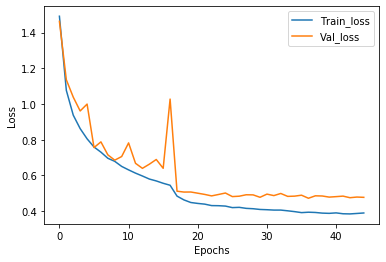

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#функция потерь

plt.plot(H.history["loss"], label = "Train_loss")
plt.plot(H.history["val_loss"], label = "Val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

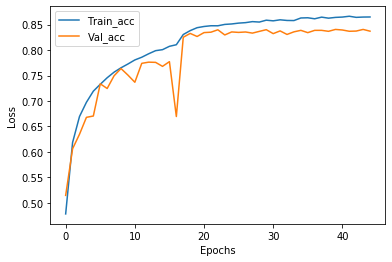

In [ ]:
plt.plot(H.history["acc"], label = "Train_acc")
plt.plot(H.history["val_acc"], label = "Val_acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Посчитайте и постройте гистограммы precision и recall для каждого класса:**

**Make precision and recall histograms for each class:**

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
TP = [i - i for i in range(len(classes))]
FN = [i - i for i in range(len(classes))]
FP = [i - i for i in range(len(classes))]

precision = [i - i for i in range(len(classes))]
recall = [i - i for i in range(len(classes))]

photo_ar = np.expand_dims(X_test, axis = 0)
photo_ar /= 255

ans = np.argmax(loaded_model.predict(photo_ar))

if ans == y_test[n]:
  TP[ans] += 1
if ans != y_test[n]:
  FN[ans] += 1
  FP[int(folder)] += 1

NameError: ignored

### Задча №2

Используя наиболее понравившийся вам фреймворк глубокого обучения, реализуйте и обучите две полносвязные нейронные сети с архитектурой 1000 -> 800 -> 600 -> 400 -> 200 -> 10 (количество нейронов в слоях от входного до выходного). В качестве функции активации для последнего слоя используйте Softmax. Для одной из них используйте dropout и батч регуляризацию, а для другой - нет. Задайте большое количество эпох обучения, сравните поведения функций потерь и метрик качества для этих сетей (их надо нарисовать!). Сделайте выводы. 

Using your favourite deep learning framework, build and train two fully connected neural networks with folowing architecture: 1000 -> 800 -> 600 -> 400 -> 200 -> 10 (the number of neurons from input to output layer). Use Softmax as activation function for the output layer. Use dropout and batch regularisation for one of networks, and don't use them for another. Set 20-40 as number of epochs and compare loss and quality metrics dymanics for both networks (you also have to visualise them!). Make some conclusions.

Так как у нас цветные изображения, а мы собираемся использовать полносвязные сети, то нам придется каким-либо образом преобразовать трехмерные тензоры в векторы. Сделаем мы это так: вытянем все три канала в один вектор.

We using fully connected networks, but we have color images, they should be tranformed from 3-dimesional tensors to vectors.

In [ ]:
print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (50000, 32, 32, 3)
Test: (10000, 32, 32, 3)


In [ ]:
X_train_one_channel = X_train.reshape(X_train.shape[0], img_rows * img_cols * img_channels)
X_test_one_channel = X_test.reshape(X_test.shape[0], img_rows * img_cols * img_channels)

In [ ]:
print("Train:", X_train_one_channel.shape)
print("Test:", X_test_one_channel.shape)

Train: (50000, 3072)
Test: (10000, 3072)


Создайте сеть с архитектурой 1000 -> 800 -> 600 -> 400 -> 200 -> 10 и обучите ее (уже без использования генераторов), заметрьте время обучения

Build and train network with architecture: 1000 -> 800 -> 600 -> 400 -> 200 -> 10 (without using generators), measure learning time

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

classifier = Sequential()

classifier.add(Dense(1000, input_shape = [3072]))
classifier.add(Activation('relu'))
classifier.add(Dense(800))
classifier.add(Activation('relu'))
classifier.add(Dense(600))
classifier.add(Activation('relu'))
classifier.add(Dense(400))
classifier.add(Activation('relu'))
classifier.add(Dense(200))
classifier.add(Activation('relu'))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train_one_channel, y_train, batch_size=100, nb_epoch=50,verbose=1, validation_data=(X_test_one_channel, y_test))
score = classifier.evaluate(X_test_one_channel, y_test, verbose=0)

In [ ]:
# Посмотрим на модель
# Have a look at our model (use .summary())


### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
activation_43 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 800)               800800    
_________________________________________________________________
activation_44 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 600)               480600    
_________________________________________________________________
activation_45 (Activation)   (None, 600)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 400)             

Отрисуйте графики точности и потерь на тестовом и на тренировочном множестве для сверточной неронной сети

Vusialize the accuracy and the loss on test and train samples for convoltional network 

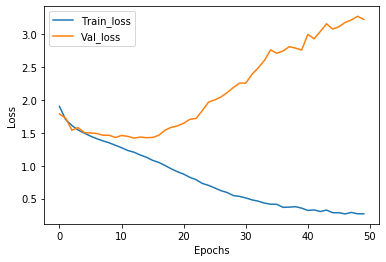

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
N = np.arange(0, 50)
plt.plot(history.history["loss"], label = "Train_loss")
plt.plot(history.history["val_loss"], label = "Val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

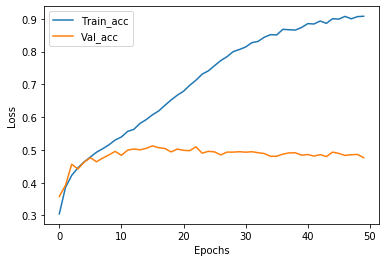

In [ ]:
N = np.arange(0, 50)
plt.plot(history.history["acc"], label = "Train_acc")
plt.plot(history.history["val_acc"], label = "Val_acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Постройте и обучите еще одну модель с такой же архитектурой, но используя между каждым Dense слоем и активацией батч нормализацию и слои dropuot после активационных функций.

Build and train another model with the samу architecture, using batch-norm layers between every Dense and activational layer, aтв dropout layers afret activation functions.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

classifier = Sequential()

classifier.add(Dense(1000, input_shape = [3072]))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(800))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(600))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(400))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(200))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(10))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Activation('softmax'))
classifier.add(Dropout(0.5))


classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train_one_channel, y_train, batch_size=100, epochs=50,verbose=1, validation_data=(X_test_one_channel, y_test))
score = classifier.evaluate(X_test_one_channel, y_test, verbose=0)

In [ ]:
# Посмотрим на модель
# Have a look at our model (use .summary())


### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
classifier.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
batch_normalization_37 (Batc (None, 1000)              4000      
_________________________________________________________________
activation_49 (Activation)   (None, 1000)              0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 800)               800800    
_________________________________________________________________
batch_normalization_38 (Batc (None, 800)               3200      
_________________________________________________________________
activation_50 (Activation)   (None, 800)             

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Отрисуйте графики точности и потерь на тестовом и на тренировочном множестве для сверточной неронной сети

Vusialize the accuracy and the loss on test and train samples for convoltional network 

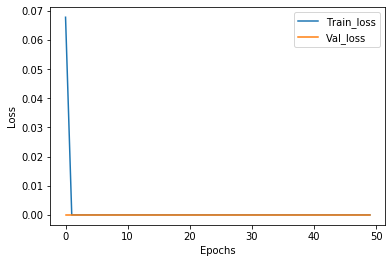

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

plt.plot(history.history["loss"], label = "Train_loss")
plt.plot(history.history["val_loss"], label = "Val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

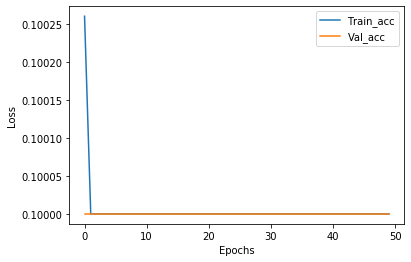

In [ ]:
N = np.arange(0, 50)
plt.plot(history.history["acc"], label = "Train_acc")
plt.plot(history.history["val_acc"], label = "Val_acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Задча №3

Реализуйте и обучите полносвязную нейронную сеть с архитектурой 100 -> 200 -> 400 -> 600 -> 800 -> 1000 -> 10. Замерьте время обучения сети. Отрисуйте графики точности и потерь на тестовом и на тренировочном множестве.


Build and train fully connected network with architecture 100 -> 200 -> 400 -> 600 -> 800 -> 1000 -> 10, measure learning time. Vusialize the accuracy and the loss on test and train samples for convoltional network 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

classifier = Sequential()

classifier.add(Dense(100, input_shape = [3072]))
classifier.add(Activation('relu'))
classifier.add(Dense(200))
classifier.add(Activation('relu'))
classifier.add(Dense(400))
classifier.add(Activation('relu'))
classifier.add(Dense(600))
classifier.add(Activation('relu'))
classifier.add(Dense(800))
classifier.add(Activation('relu'))
classifier.add(Dense(1000))
classifier.add(Activation('relu'))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))



classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train_one_channel, y_train, batch_size=100, epochs=50,verbose=1, validation_data=(X_test_one_channel, y_test))
score = classifier.evaluate(X_test_one_channel, y_test, verbose=0)

In [ ]:
# Посмотрим на модель
# Have a look at our model (use .summary())


### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
classifier.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 100)               307300    
_________________________________________________________________
activation_55 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_56 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 400)               80400     
_________________________________________________________________
activation_57 (Activation)   (None, 400)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 600)             

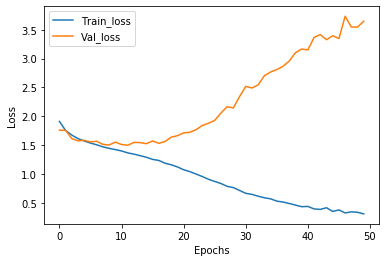

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.plot(history.history["loss"], label = "Train_loss")
plt.plot(history.history["val_loss"], label = "Val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

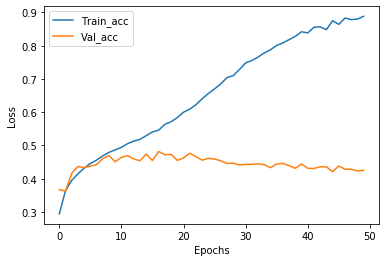

In [ ]:
N = np.arange(0, 50)
plt.plot(history.history["acc"], label = "Train_acc")
plt.plot(history.history["val_acc"], label = "Val_acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Выводы**

Сравнив качество, количество параметров и быстродействии всех трех сетей, сделайте выводы о том, что лучше использовать для работы с изображениями, и какая архитектура должна быть у полносвязных сетей (следующий слой должен содержать больше или меньше нейронов, чем предыдущий?). Подумайте, почему. Сравните результаты обучения полносвязных сетей из задания №2: помогает ли dropuot от переобучения?

Compare all charachteristics of all three neworks and make a conclusion, what fully connected architecture if better for iman=ge processing. Why? 
Compare results from task 2: does dropout help? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Готовые ноутбуки сохраняйте строго в формате .ipynb, 
**название файла должно иметь вид: Surname_Name_HWnumber.ipynb . Например: Lindemann_Nikita_03.ipynb

## Отправляйте ваши ноутбуки в гугл форму: 
https://docs.google.com/forms/d/e/1FAIpQLScBQiBqU5Sq2KK1fxy7Ot474vyTUUSG6V63s9tfgKMlbJPecQ/viewform


# Спасибо за терпение и выполнение заданий!